Evaluation Project - 5

Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
df.shape

(32560, 15)

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [9]:
df['Workclass']=df.Workclass.str.replace('?','Private')
df['Workclass'].value_counts()

C:\Users\HP\AppData\Local\Temp/ipykernel_15296/4233772812.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Workclass']=df.Workclass.str.replace('?','Private')


 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df['Occupation']=df.Occupation.str.replace('?','Prof-specialty')
df['Occupation'].value_counts()

C:\Users\HP\AppData\Local\Temp/ipykernel_15296/1289425840.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Occupation']=df.Occupation.str.replace('?','Prof-specialty')


 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [11]:
df['Native_country']=df.Native_country.str.replace('?','United-States')
df['Native_country'].value_counts()

C:\Users\HP\AppData\Local\Temp/ipykernel_15296/3064775008.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Native_country']=df.Native_country.str.replace('?','United-States')


 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [12]:
df.drop(['Capital_gain','Capital_loss'],inplace=True,axis=1)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [13]:
df.loc[df['Income']==' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


9     10501
10   

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Hours_per_week  32560 non-null  int64 
 11  Native_country  32560 non-null  object
 12  Income          32560 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [16]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [17]:
df_cat=[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        df_cat.append(i)
print(df_cat)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [18]:
df_num=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="int64":
        df_num.append(i)
print(df_num)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


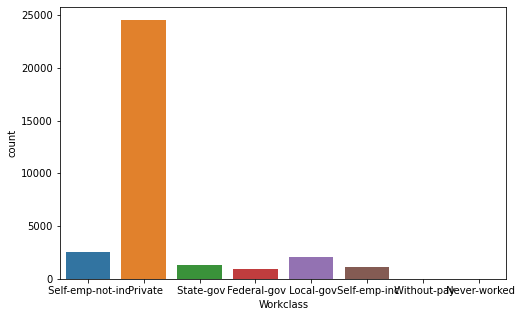

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(df['Workclass'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


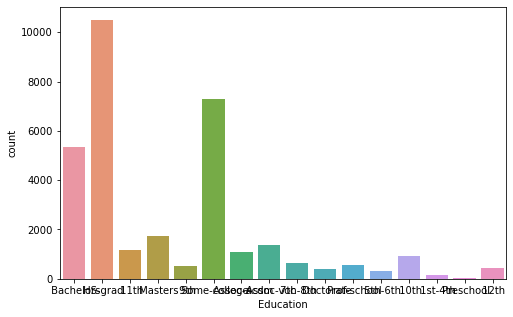

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(df['Education'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


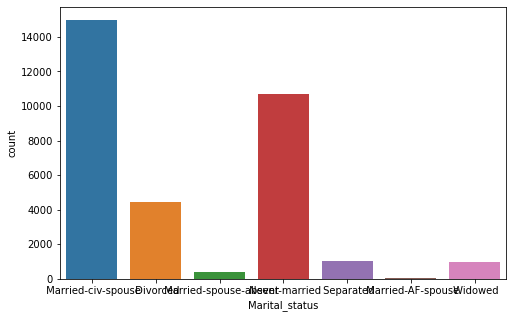

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(df['Marital_status'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


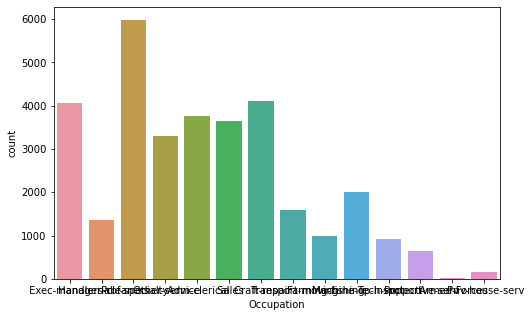

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(df['Occupation'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


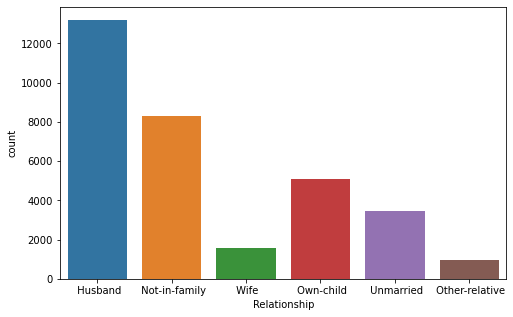

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(df['Relationship'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


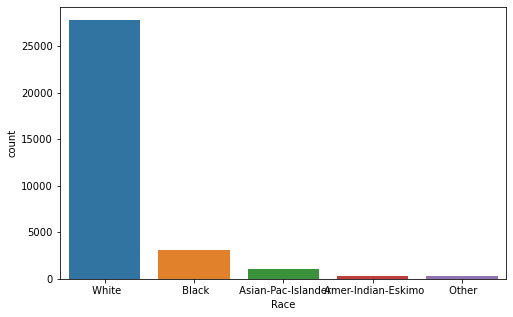

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(df['Race'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


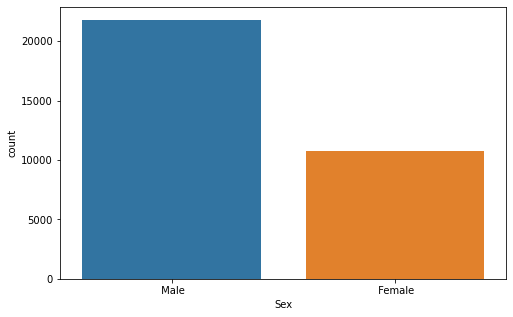

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(df['Sex'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


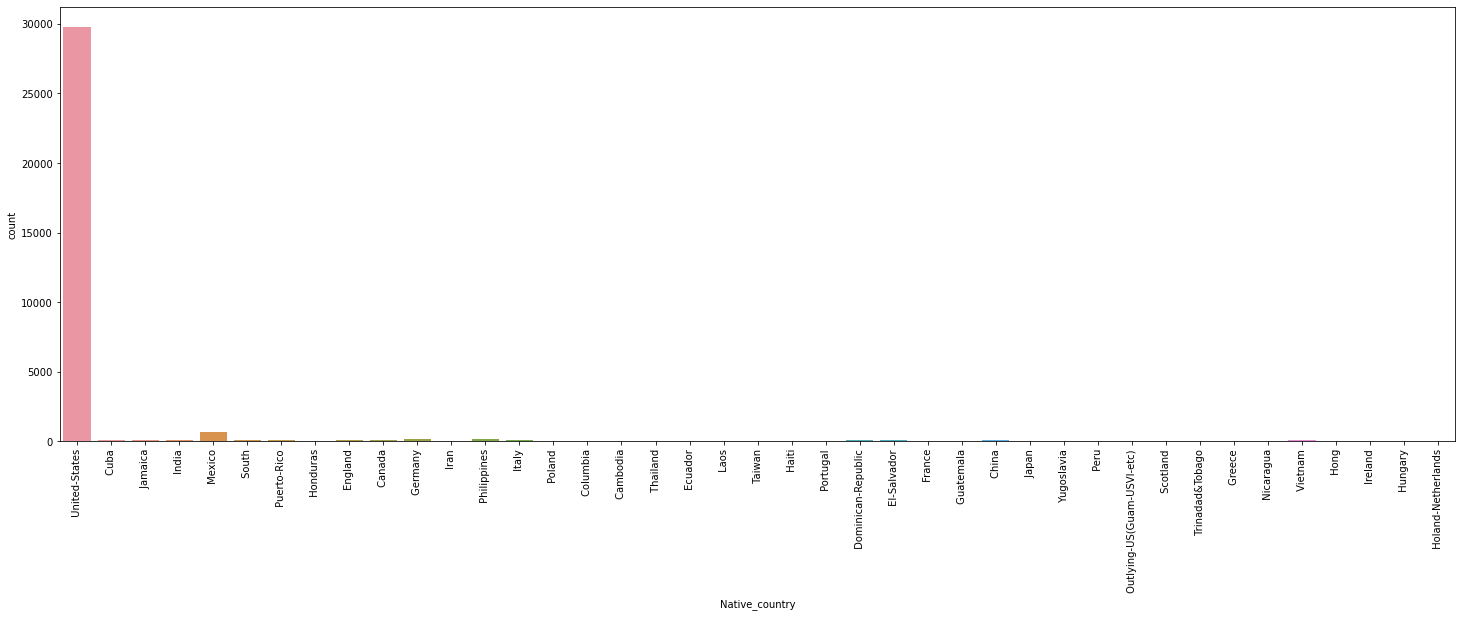

In [26]:
plt.figure(figsize=(25,8))
sns.countplot(df['Native_country'],)
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


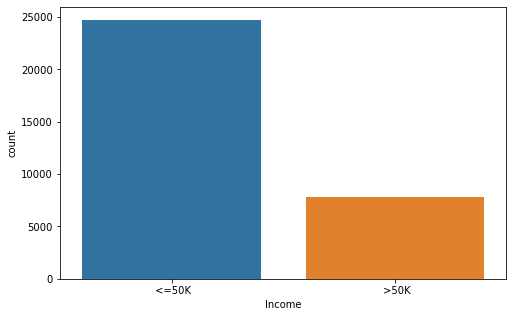

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(df['Income'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

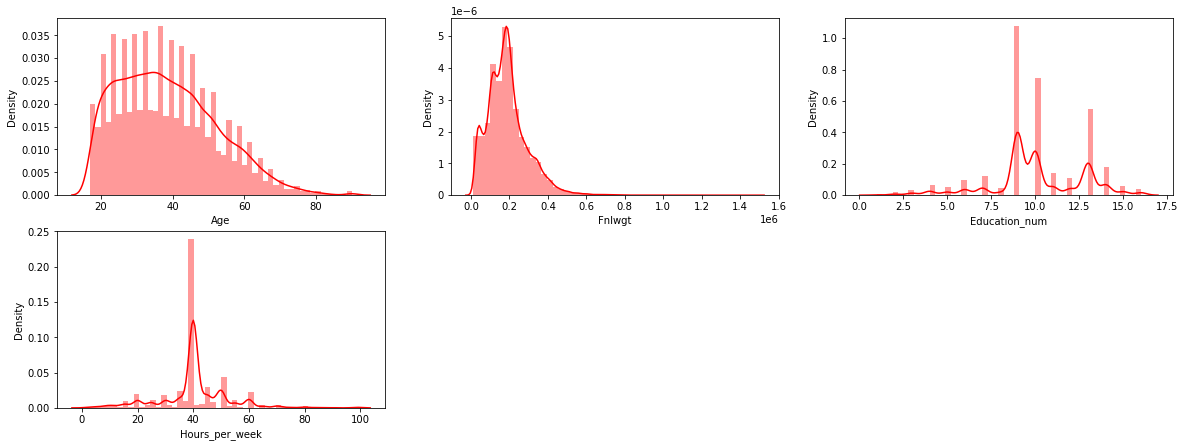

In [28]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df_num:
    if plotnumber <=5:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[i],color='red')
    plotnumber +=1
plt.show()

<Figure size 720x720 with 0 Axes>

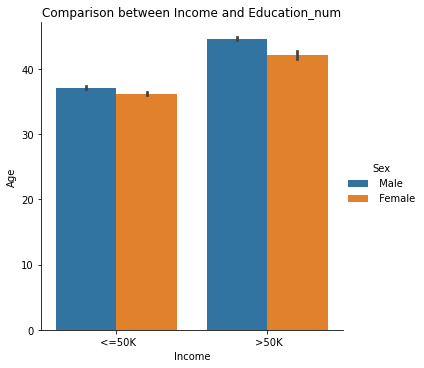

In [29]:
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Age',data=df,kind='bar',hue="Sex")
plt.title('Comparison between Income and Education_num')
plt.show()

<Figure size 720x720 with 0 Axes>

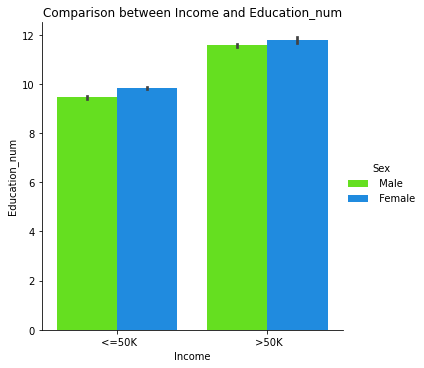

In [30]:
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Education_num',data=df,kind='bar',hue="Sex",palette="gist_rainbow")
plt.title('Comparison between Income and Education_num')
plt.show()

<Figure size 720x720 with 0 Axes>

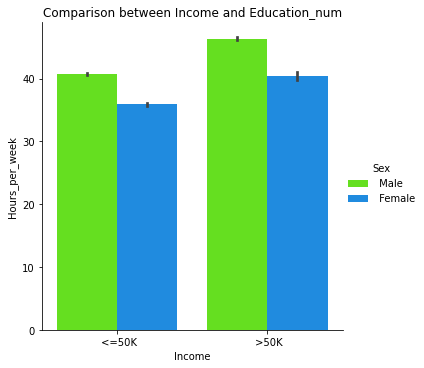

In [31]:
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Hours_per_week',data=df,kind='bar',hue="Sex",palette="gist_rainbow")
plt.title('Comparison between Income and Education_num')
plt.show()

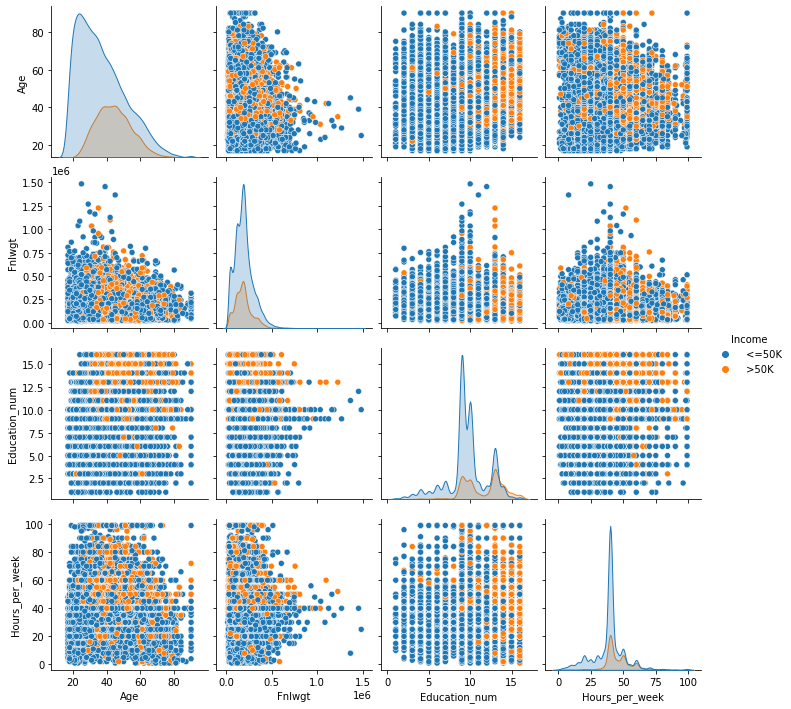

In [32]:
sns.pairplot(df,hue='Income')

In [33]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Hours_per_week  32560 non-null  int64 
 11  Native_country  32560 non-null  object
 12  Income          32560 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [35]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [36]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [37]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: ' Self-emp-not-inc'

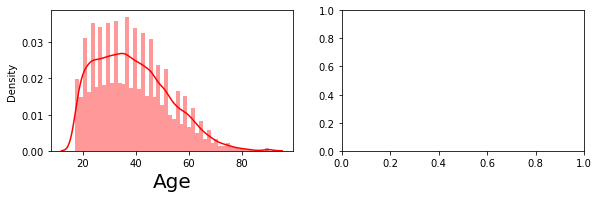

In [38]:
#All data encoded
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

As per the skew daigram, all data is skewed and kurtosis, so we have to remove this to make a perfeect model to get best accuracy for the prediction.

In [39]:
df.corr()

,Age,Fnlwgt,Education_num,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.148127
Hours_per_week,0.068756,-0.018770,0.148127,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

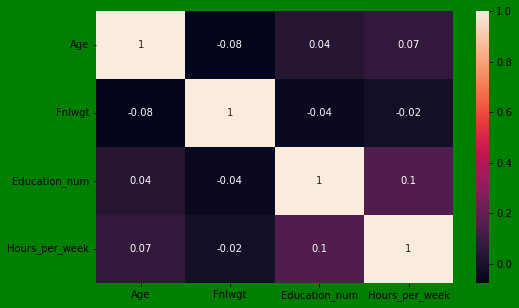

In [40]:
plt.figure(figsize=(8,5),facecolor='green')
sns.heatmap(df.corr(),annot= True,fmt='.1g',linecolor='blue')
plt.show

The heatmap shows the coorelation matrix by visiulaizing the data, from the data we can observe the relation between features and label.
There is no such relation between the target and the label.
the columns age shows some relation with Income variable but i think its not supportive.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

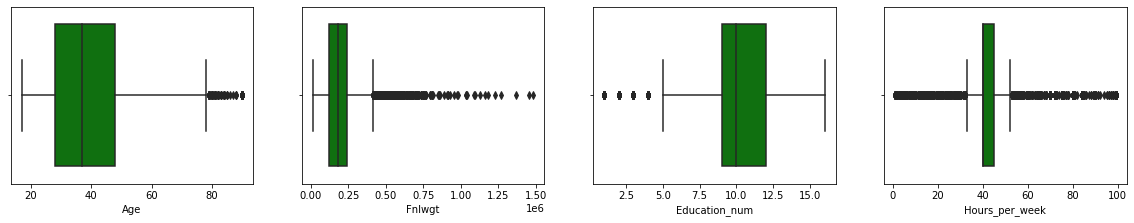

In [41]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df_num:
    if plotnumber <=5:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[i],color='g')
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.show()

# Remove the Outliers and Skewness.

In [43]:
from scipy.stats import zscore
dd=df[['Age','Fnlwgt','Education_num','Hours_per_week']]
z=np.abs(zscore(dd))
df1=df[(z<3).all(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


Zscore Method:

In [44]:
Data_loss=(32560-31461)/32560*100
Data_loss

3.3753071253071254

Inter Quantile Method:

In [45]:
q1=dd.quantile(.25)

q3=dd.quantile(.75)

iqr=q3-q1


df2=df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]
df2

C:\Users\HP\AppData\Local\Temp/ipykernel_15296/1984664833.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2=df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [46]:
data_loss=(32560-21950)*100/32560
data_loss

32.58599508599509

Data Loss due to Zscore is less as compare to IQR, Hence we continue with Zscore. 

In [47]:
df1.skew()

C:\Users\HP\AppData\Local\Temp/ipykernel_15296/149261804.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

In [48]:
df1['Fnlwgt']=np.cbrt(dd['Fnlwgt'])
df1['Age'] = np.sqrt(dd['Age'])
df1.skew()
df1['Fnlwgt']=np.sqrt(dd['Age'])

C:\Users\HP\AppData\Local\Temp/ipykernel_15296/1183803675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Fnlwgt']=np.cbrt(dd['Fnlwgt'])
C:\Users\HP\AppData\Local\Temp/ipykernel_15296/1183803675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = np.sqrt(dd['Age'])
C:\Users\HP\AppData\Local\Temp/ipykernel_15296/1183803675.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Se

In [49]:
df1.skew()

C:\Users\HP\AppData\Local\Temp/ipykernel_15296/149261804.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


Age               0.152440
Fnlwgt            0.152440
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

In [50]:
#df1.drop(['Age','Fnlwgt','Education_num','Hours_per_week'],inplace=True, axis=1)

In [51]:
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,7.071068,Self-emp-not-inc,7.071068,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,6.164414,Private,6.164414,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,7.280110,Private,7.280110,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,5.291503,Private,5.291503,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,6.082763,Private,6.082763,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5.196152,Private,5.196152,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,6.324555,Private,6.324555,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,7.615773,Private,7.615773,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,4.690416,Private,4.690416,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [52]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df1['Workclass']=le.fit_transform(df1['Workclass'])
df1['Education']=le.fit_transform(df1['Education'])
df1['Education_num']=le.fit_transform(df1['Education_num'])
df1['Marital_status']=le.fit_transform(df1['Marital_status'])
df1['Occupation']=le.fit_transform(df1['Occupation'])
df1['Relationship']=le.fit_transform(df1['Relationship'])
df1['Race']=le.fit_transform(df1['Race'])
df1['Native_country']=le.fit_transform(df1['Native_country'])
df1['Income']=le.fit_transform(df1['Income'])
df1['Sex']=le.fit_transform(df1['Sex'])

C:\Users\HP\AppData\Local\Temp/ipykernel_15296/1325383226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Workclass']=le.fit_transform(df1['Workclass'])
C:\Users\HP\AppData\Local\Temp/ipykernel_15296/1325383226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Education']=le.fit_transform(df1['Education'])
C:\Users\HP\AppData\Local\Temp/ipykernel_15296/1325383226.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [53]:
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,7.071068,5,7.071068,8,10,2,3,0,4,1,13,38,0
1,6.164414,3,6.164414,10,6,0,5,1,4,1,40,38,0
2,7.280110,3,7.280110,1,4,2,5,0,2,1,40,38,0
3,5.291503,3,5.291503,8,10,2,9,5,2,0,40,4,0
4,6.082763,3,6.082763,11,11,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5.196152,3,5.196152,6,9,2,12,5,4,0,38,38,0
32556,6.324555,3,6.324555,10,6,2,6,0,4,1,40,38,1
32557,7.615773,3,7.615773,10,6,6,0,4,4,0,40,38,0
32558,4.690416,3,4.690416,10,6,4,0,3,4,1,20,38,0


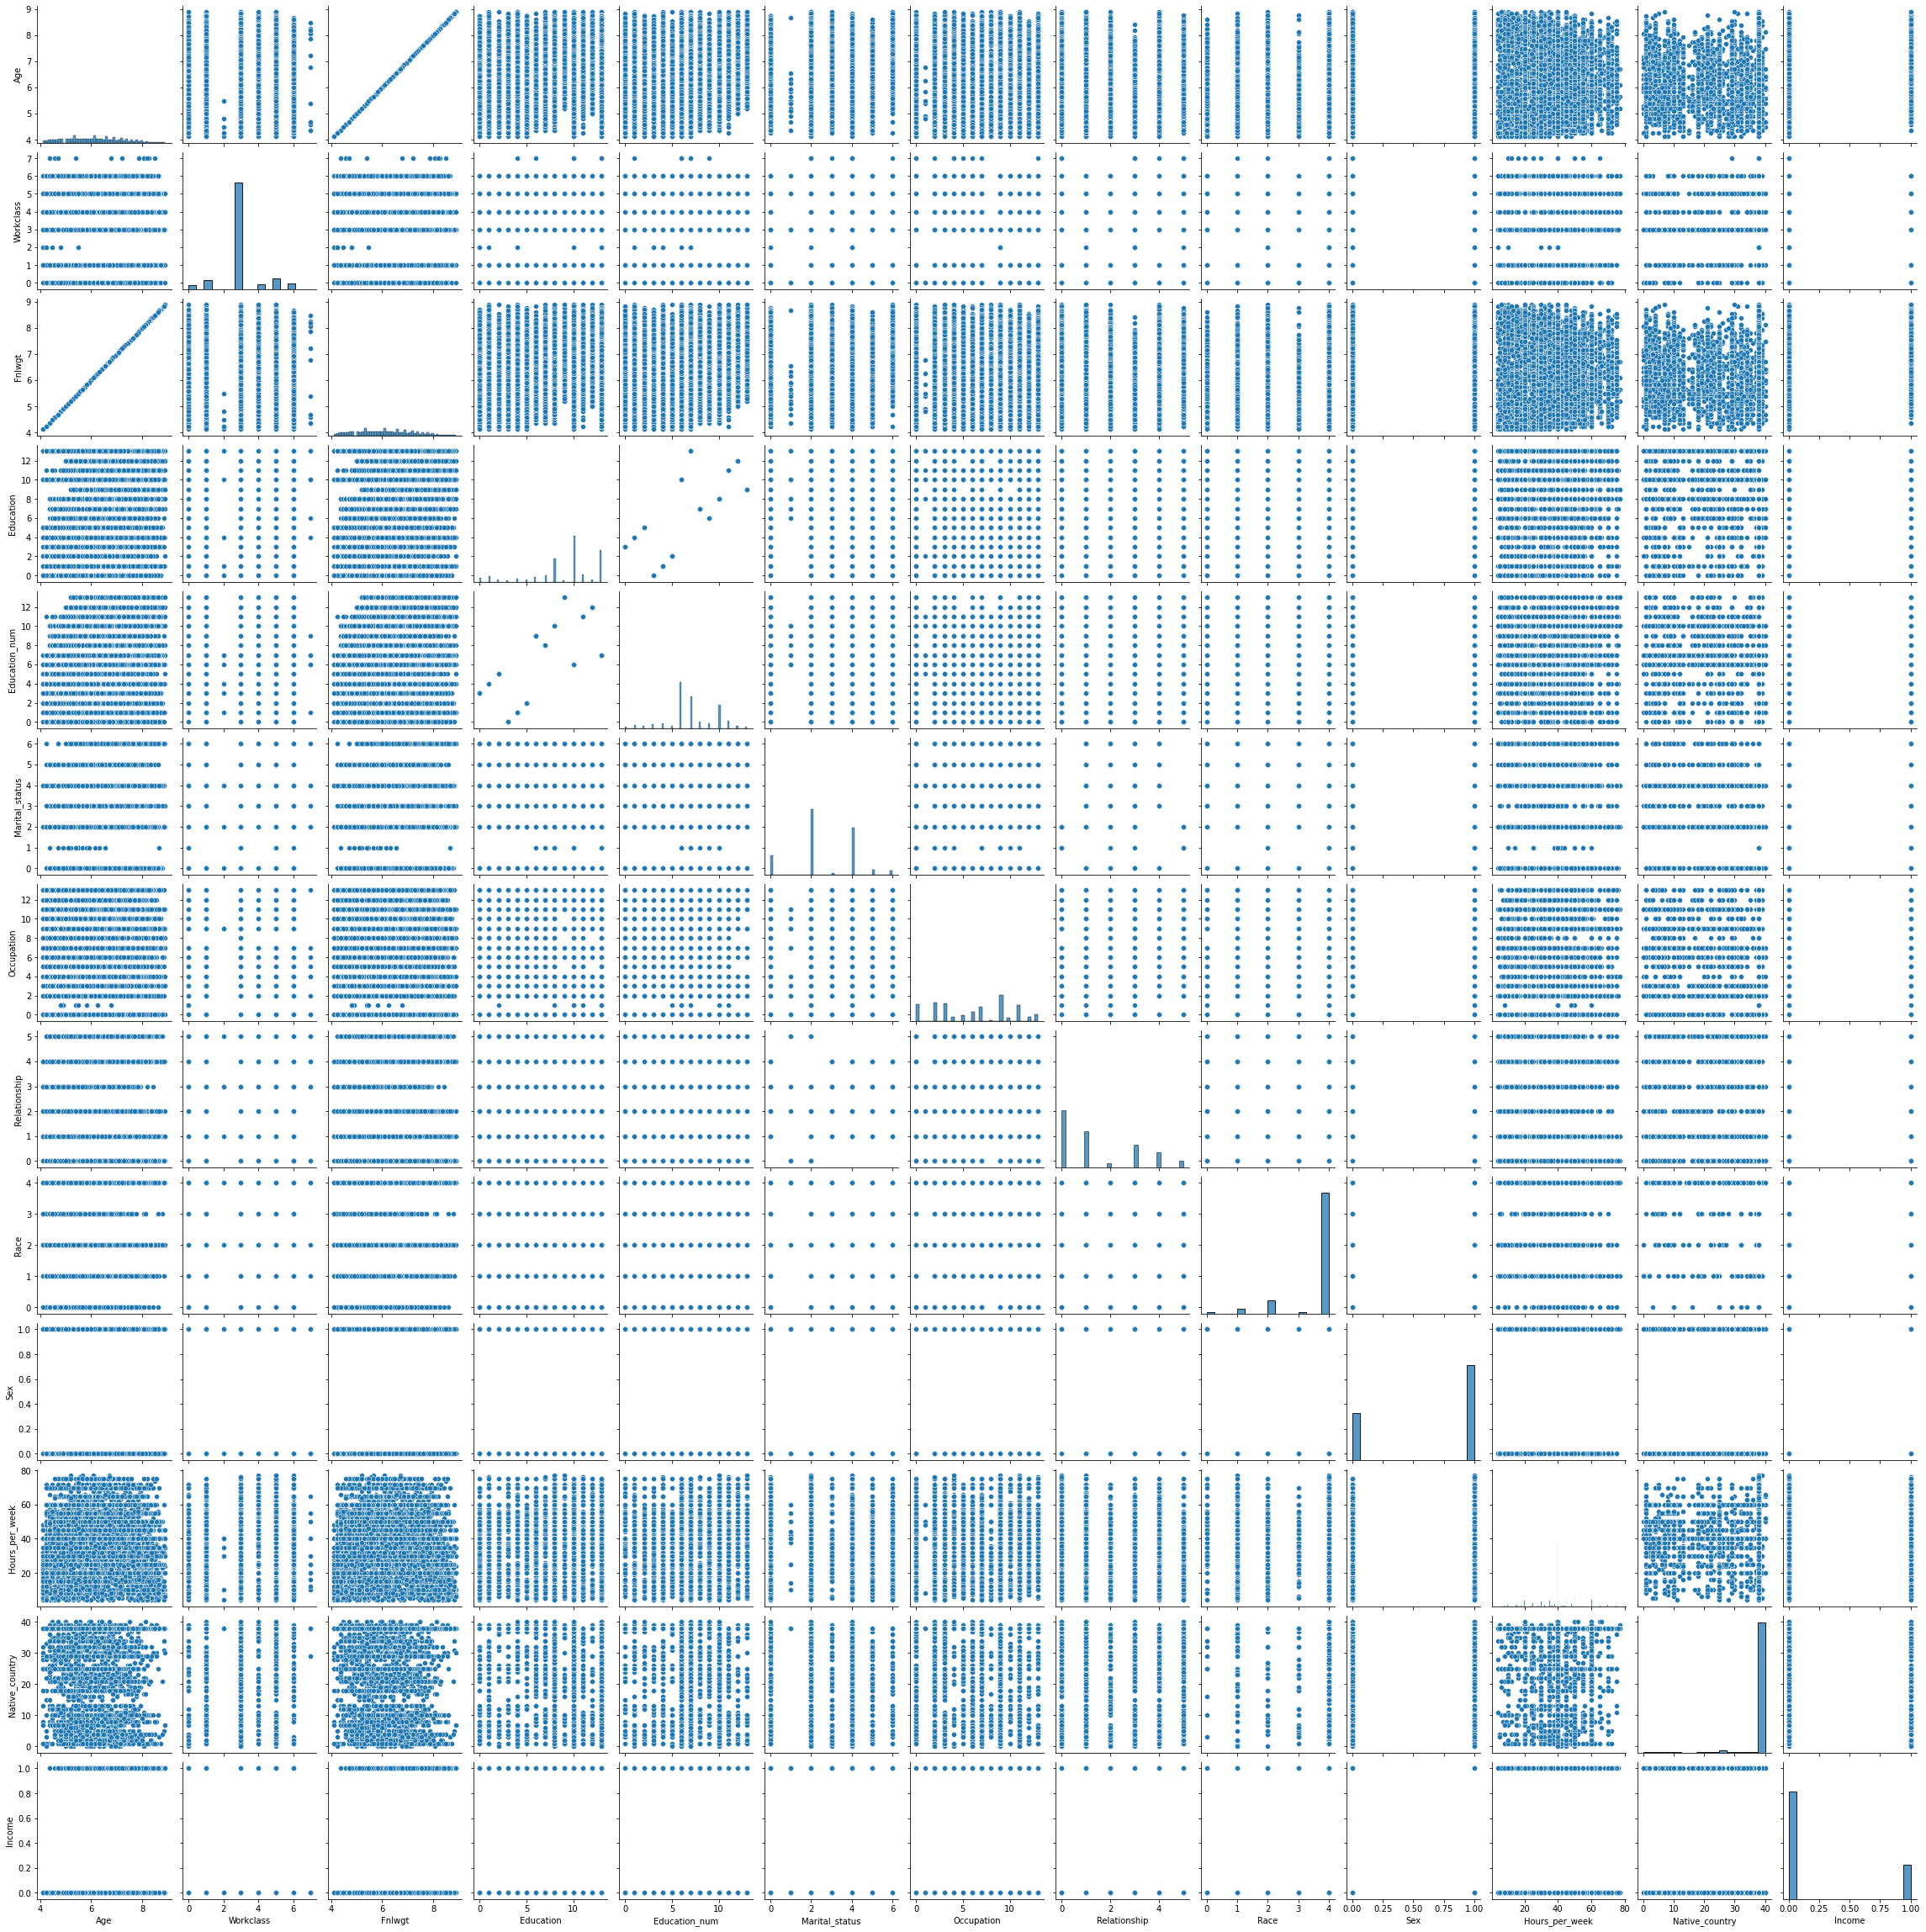

In [54]:
sns.pairplot(df1)

In [55]:
df1.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.035960,1.000000,0.009722,0.072225,-0.314906,-0.007686,-0.279215,0.026845,0.099379,0.133602,-0.002758,0.265521
Workclass,0.035960,1.000000,0.035960,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,1.000000,0.035960,1.000000,0.009722,0.072225,-0.314906,-0.007686,-0.279215,0.026845,0.099379,0.133602,-0.002758,0.265521
Education,0.009722,0.004652,0.009722,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.072225,0.003831,0.072225,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.314906,-0.020597,-0.314906,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.007686,0.007551,-0.007686,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.279215,-0.056825,-0.279215,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.026845,0.046295,0.026845,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.099379,0.070095,0.099379,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


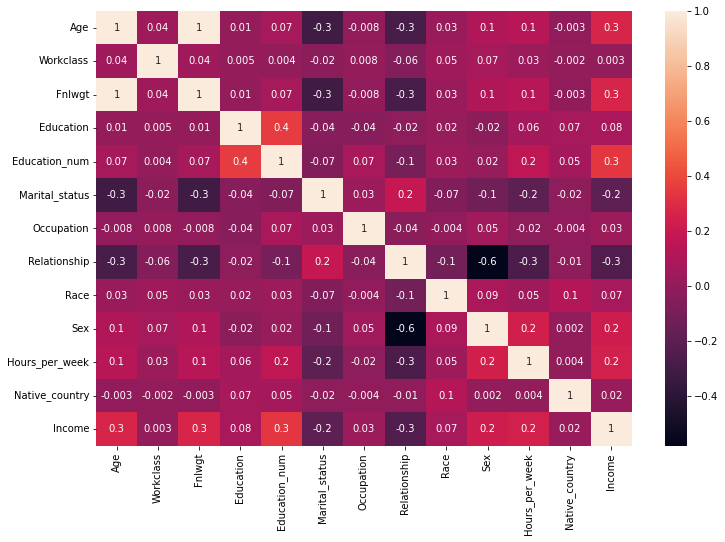

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot = True,fmt='.1g')
plt.show()

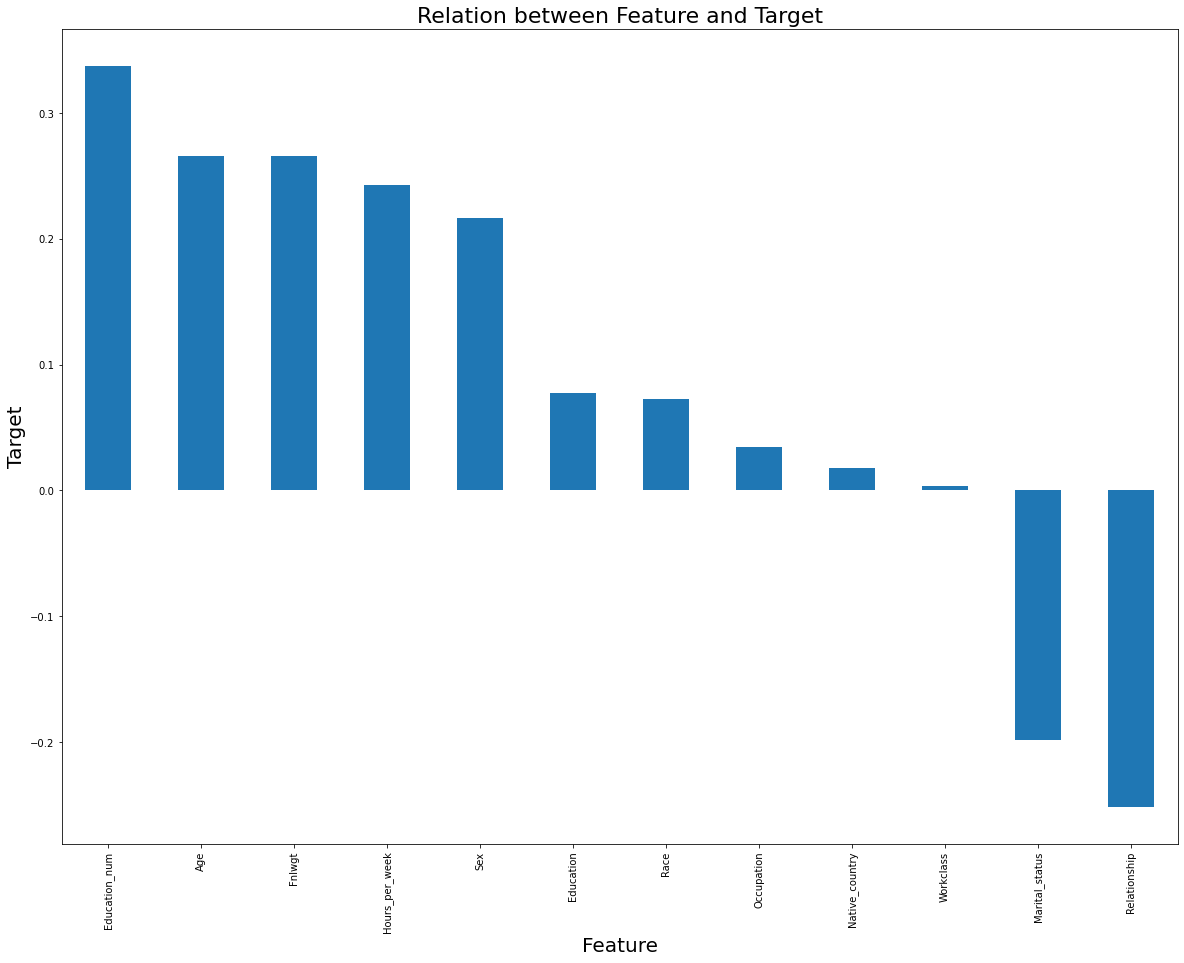

In [57]:
plt.figure(figsize=(20,15))
df1.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Relation between Feature and Target',fontsize=22)
plt.show()

In [58]:
# Separating Feature and Label variables 
x=df1.drop('Income',axis=1)
y=df1['Income']

In [59]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,7.071068,5,7.071068,8,10,2,3,0,4,1,13,38
1,6.164414,3,6.164414,10,6,0,5,1,4,1,40,38
2,7.280110,3,7.280110,1,4,2,5,0,2,1,40,38
3,5.291503,3,5.291503,8,10,2,9,5,2,0,40,4
4,6.082763,3,6.082763,11,11,2,3,5,4,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5.196152,3,5.196152,6,9,2,12,5,4,0,38,38
32556,6.324555,3,6.324555,10,6,2,6,0,4,1,40,38
32557,7.615773,3,7.615773,10,6,6,0,4,4,0,40,38
32558,4.690416,3,4.690416,10,6,4,0,3,4,1,20,38


In [60]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31461, dtype: int32

In [61]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
scal= StandardScaler()
x=pd.DataFrame(scal.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.906528,1.722723,0.906528,-0.348344,1.154324,-0.403597,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,0.061868,-0.080441,0.061868,0.245782,-0.459657,-1.733114,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.101276,-0.080441,1.101276,-2.427783,-1.266647,-0.403597,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.751357,-0.080441,-0.751357,-0.348344,1.154324,-0.403597,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.014201,-0.080441,-0.014201,0.542845,1.557819,-0.403597,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.840187,-0.080441,-0.840187,-0.942469,0.750829,-0.403597,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.211059,-0.080441,0.211059,0.245782,-0.459657,-0.403597,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.413988,-0.080441,1.413988,0.245782,-0.459657,2.255438,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.311343,-0.080441,-1.311343,0.245782,-0.459657,0.925921,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


In [62]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [63]:
# Over Sampling the Data
from imblearn.over_sampling import SMOTE

# not install yet.

ModuleNotFoundError: No module named 'imblearn'

In [64]:
# Now the dataframe is cleaned and filtered. Now Start modeling.
# Find the best Random State

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve,r2_score

maxAccu = 0
maxRs = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    predd=dtc.predict(x_test)
    acc=accuracy_score(y_test,predd)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('best accuracy score:',maxAccu,' at random state',maxRs)

best accuracy score: 0.7933043754635025  at random state 85


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=163,test_size=.30)

In [67]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
knc=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
bc=BaggingClassifier()
adc=AdaBoostClassifier()
rfc=RandomForestClassifier()

In [68]:
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7913973937917153
[[6237  906]
 [1063 1233]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7143
           1       0.58      0.54      0.56      2296

    accuracy                           0.79      9439
   macro avg       0.72      0.71      0.71      9439
weighted avg       0.79      0.79      0.79      9439



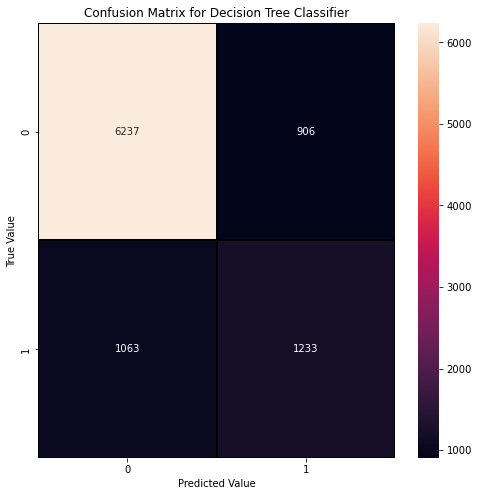

In [69]:
cm=confusion_matrix(y_test,preddtc)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',xticklabels=['0','1'],yticklabels=['0','1'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [70]:
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8282657061129357
[[6700  443]
 [1178 1118]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7143
           1       0.72      0.49      0.58      2296

    accuracy                           0.83      9439
   macro avg       0.78      0.71      0.74      9439
weighted avg       0.82      0.83      0.82      9439



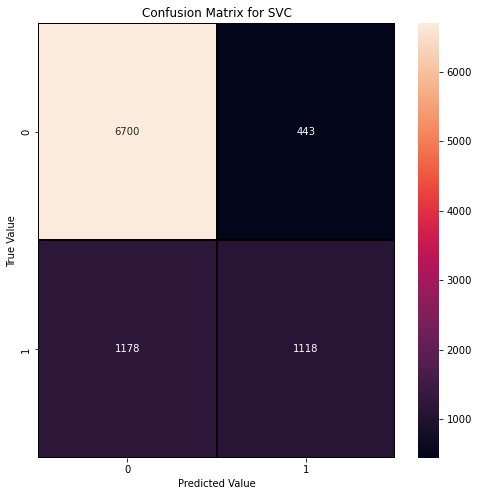

In [71]:
cm=confusion_matrix(y_test,predsvc)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',xticklabels=['0','1'],yticklabels=['0','1'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for SVC')
plt.show()

In [72]:
knc.fit(x_train,y_train)
predknc = knc.predict(x_test)
print(accuracy_score(y_test,predknc))
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

0.8175654200656849
[[6417  726]
 [ 996 1300]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7143
           1       0.64      0.57      0.60      2296

    accuracy                           0.82      9439
   macro avg       0.75      0.73      0.74      9439
weighted avg       0.81      0.82      0.81      9439



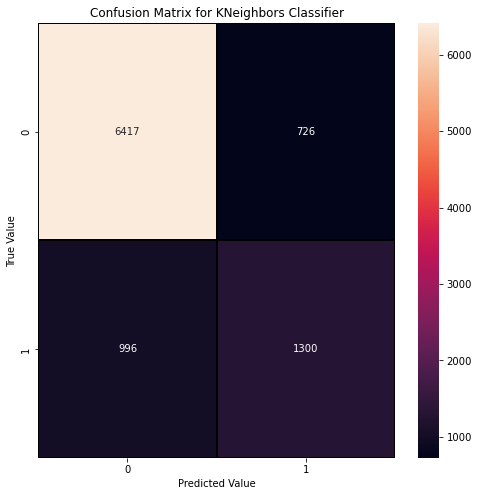

In [73]:
cm=confusion_matrix(y_test,predknc)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',xticklabels=['0','1'],yticklabels=['0','1'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

In [74]:
gbc.fit(x_train,y_train)
predgbc = gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8414026909630258
[[6618  525]
 [ 972 1324]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7143
           1       0.72      0.58      0.64      2296

    accuracy                           0.84      9439
   macro avg       0.79      0.75      0.77      9439
weighted avg       0.83      0.84      0.84      9439



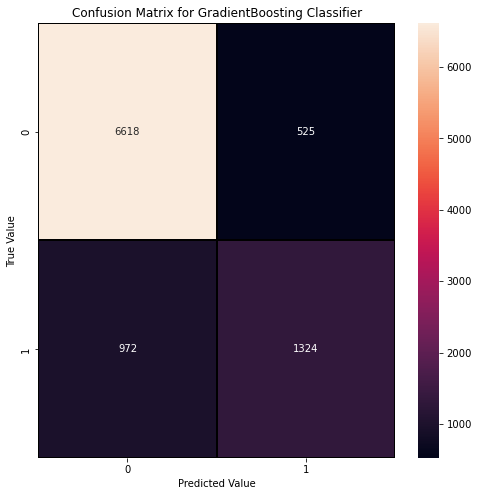

In [75]:
cm=confusion_matrix(y_test,predgbc)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',xticklabels=['0','1'],yticklabels=['0','1'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for GradientBoosting Classifier')
plt.show()

In [76]:
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8130098527386376
[[6405  738]
 [1027 1269]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7143
           1       0.63      0.55      0.59      2296

    accuracy                           0.81      9439
   macro avg       0.75      0.72      0.73      9439
weighted avg       0.81      0.81      0.81      9439



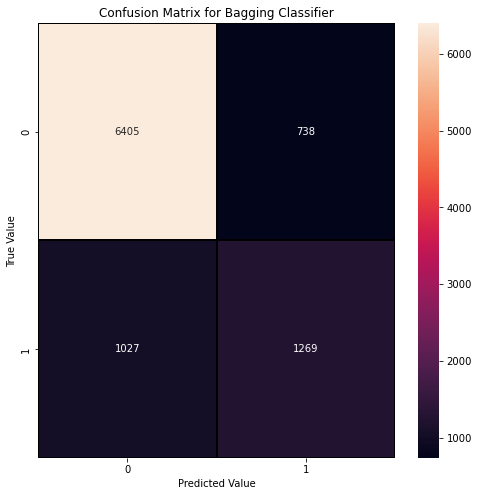

In [77]:
cm=confusion_matrix(y_test,predbc)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',xticklabels=['0','1'],yticklabels=['0','1'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

In [78]:
adc.fit(x_train,y_train)
predadc = adc.predict(x_test)
print(accuracy_score(y_test,predadc))
print(confusion_matrix(y_test,predadc))
print(classification_report(y_test,predadc))

0.8382243881767136
[[6610  533]
 [ 994 1302]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7143
           1       0.71      0.57      0.63      2296

    accuracy                           0.84      9439
   macro avg       0.79      0.75      0.76      9439
weighted avg       0.83      0.84      0.83      9439



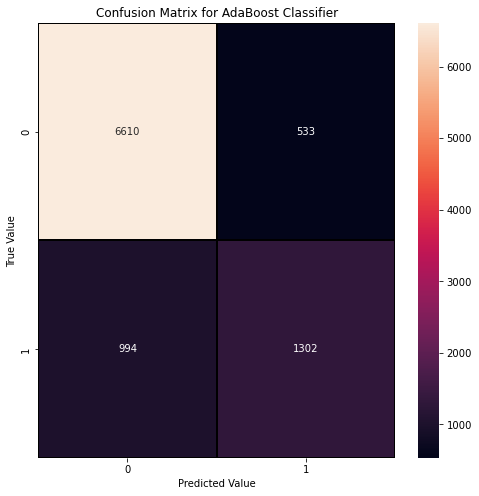

In [79]:
cm=confusion_matrix(y_test,predadc)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',xticklabels=['0','1'],yticklabels=['0','1'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

In [80]:
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8208496662782074
[[6448  695]
 [ 996 1300]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7143
           1       0.65      0.57      0.61      2296

    accuracy                           0.82      9439
   macro avg       0.76      0.73      0.74      9439
weighted avg       0.81      0.82      0.82      9439



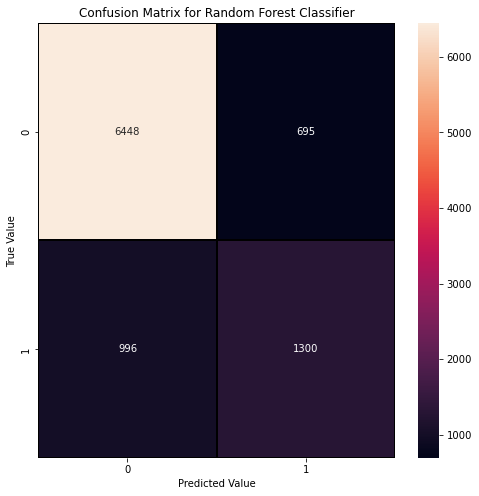

In [81]:
cm=confusion_matrix(y_test,predrfc)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',xticklabels=['0','1'],yticklabels=['0','1'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [82]:
# Checking the Cross Validation Score

from sklearn.model_selection import cross_val_score

In [83]:
#CV score for DTC
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7789326054671387


In [84]:
#CV score for SVC
print(cross_val_score(svc,x,y,cv=5).mean())

KeyboardInterrupt: 

In [85]:
#CV score for KNC
print(cross_val_score(knc,x,y,cv=5).mean())

0.8131656542466533


In [86]:
#CV score for GBC
print(cross_val_score(gbc,x,y,cv=5).mean())

0.839960742059033


In [87]:
#CV score for BC
print(cross_val_score(bc,x,y,cv=5).mean())

0.8099235075774667


In [88]:
#CV score for ADC
print(cross_val_score(adc,x,y,cv=5).mean())

0.8359239910660682


In [89]:
#CV score for RFC
print(cross_val_score(rfc,x,y,cv=5).mean())

0.817774464386862


The least difference between the Accuracy score and CV Score is 0.0021. Hence we conclude that Random Forests is the best fitting model for Census Income Project.

# Hyperparameter Tuning 

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
# Random forests parameters:
parameters={'criterion':["gini","entropy"],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,20,30,40,50],
             "min_samples_leaf":[2,3,4,5,6]}

In [92]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [ ]:
gcv.fit(x_train,y_train)  #this code take alot time to run around 25 mins, after trying 3 times nothing happens. 

In [94]:
gcv.best

AttributeError: 'GridSearchCV' object has no attribute 'best'

In [95]:
census=RandomForestClassifier()
census.fit(x_train,y_train)
pred_census=census.predict(x_test)
accu=accuracy_score(y_test,pred_census)

In [96]:
# Plot ROC and compare AUC for all the models.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings

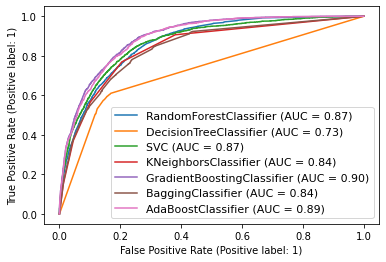

In [97]:
dist=plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(dtc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(svc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(knc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(bc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(adc,x_test,y_test,ax=dist.ax_)

plt.legend(prop={'size':11}, loc= 'lower right')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


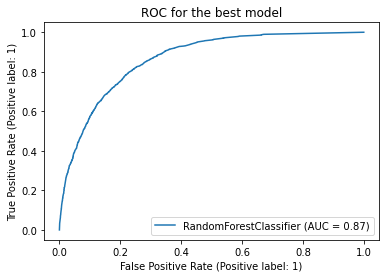

In [98]:
plot_roc_curve(census,x_test,y_test)
plt.title('ROC for the best model')
plt.show()

In [99]:
import joblib

In [100]:
joblib.dump(census,'Census Income Prediction.pkl')

['Census Income Prediction.pkl']